In [2]:
import optax

In [16]:
schedule = optax.warmup_cosine_decay_schedule(
              init_value=1e-6,
              peak_value=1e-3,
              warmup_steps=10,
              decay_steps=100,
              end_value = 1e-6,
            )

optimizer = optax.chain(
            optax.clip(32.0), # Clip gradients,.
            optax.adamw(
                learning_rate=schedule,
                b1=0.9,
                b2=0.95,
                eps=1e-8,
                weight_decay=0.1
            )
        )

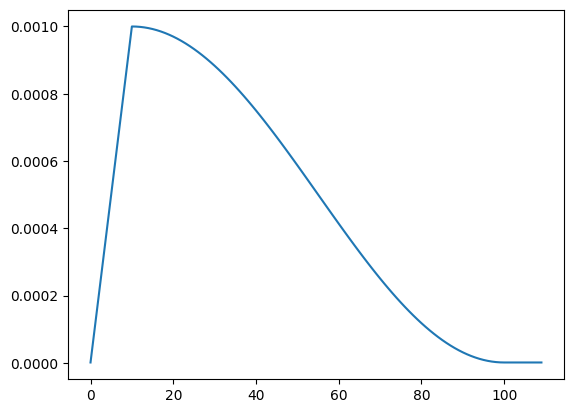

In [17]:
import matplotlib.pyplot as plt 
learning_rates = [schedule(epoch) for epoch in range(110)]
plt.plot(learning_rates)